In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming the data is already fetched and stored in a DataFrame
# # Replace this with your actual data
# data = {
#     'City': ['London', 'Paris', 'New York', 'Tokyo', 'Mumbai'],
#     'Temp': [60, 58, 62, 65, 80],
#     'Temp_Min': [55, 52, 57, 60, 75],
#     'Temp_Max': [65, 64, 68, 70, 85],
#     'Humidity': [80, 75, 70, 65, 85]
# }

# # Create DataFrame
# df = pd.DataFrame(data)

# # Bar plot for temperature variations (Temp, Temp_Min, Temp_Max)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='City', y='value', hue='variable', 
#             data=pd.melt(df, id_vars=['City'], value_vars=['Temp', 'Temp_Min', 'Temp_Max']))
# plt.title('Temperature Variations by City')
# plt.xlabel('City')
# plt.ylabel('Temperature (°F)')
# plt.legend(title='Temperature Type')
# plt.show()

# # Bar plot for humidity
# plt.figure(figsize=(10, 6))
# sns.barplot(x='City', y='Humidity', data=df)
# plt.title('Humidity by City')
# plt.xlabel('City')
# plt.ylabel('Humidity (%)')
# plt.show()


# ### Steps for the Next Tasks

# 1. Data Extraction:
#    - Use Python to fetch weather data for the specified cities using the OpenWeatherMap API endpoint provided.
#    - Parse the JSON response to extract the temp, temp_min, temp_max, and humidity.

# 2. Data Transformation:
#    - Convert temperatures from Kelvin to Fahrenheit:
#      \[
#      \text{Temp (°F)} = (\text{Temp (K)} - 273.15) \times 9/5 + 32
#      \]

# 3. Data Storage:
#    - Connect to an SQL Server database using a library like pyodbc or sqlalchemy.
#    - Create a table named WeatherData with columns: City, Temp, Temp_Min, Temp_Max, and Humidity.
#    - Insert the transformed data into the table.

In [2]:
import requests

def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

API_KEY = "1a1f1994f413a7e6d0b7ffa03585f07d"  
BASE_URL = "http://api.weatherstack.com/current"
cities = ["London", "Paris", "New York", "Tokyo", "Mumbai"]


weather_data = []
for city in cities:
    response = requests.get(BASE_URL, params={"access_key": API_KEY, "query": city})
    if response.status_code == 200:
        data = response.json()
        if "current" in data:
            city_weather = {
                "City": city,
                "Temp": celsius_to_fahrenheit(data["current"]["temperature"]), 
                "Temp_Min": celsius_to_fahrenheit(data["current"]["temperature"] - 2),  
                "Temp_Max": celsius_to_fahrenheit(data["current"]["temperature"] + 2), 
                "Humidity": data["current"]["humidity"],
                "Feels_Like": celsius_to_fahrenheit(data["current"]["feelslike"]) 
            }
            weather_data.append(city_weather)
        else:
            print(f"Error fetching data for {city}: {data.get('error', {}).get('info', 'Unknown error')}")
    else:
        print(f"Failed to fetch data for {city}. HTTP Status Code: {response.status_code}")


for data in weather_data:
    print(data)


{'City': 'London', 'Temp': 46.4, 'Temp_Min': 42.8, 'Temp_Max': 50.0, 'Humidity': 71, 'Feels_Like': 39.2}
{'City': 'Paris', 'Temp': 50.0, 'Temp_Min': 46.4, 'Temp_Max': 53.6, 'Humidity': 71, 'Feels_Like': 46.4}
{'City': 'New York', 'Temp': 33.8, 'Temp_Min': 30.2, 'Temp_Max': 37.4, 'Humidity': 43, 'Feels_Like': 23.0}
{'City': 'Tokyo', 'Temp': 59.0, 'Temp_Min': 55.4, 'Temp_Max': 62.6, 'Humidity': 31, 'Feels_Like': 59.0}
{'City': 'Mumbai', 'Temp': 82.4, 'Temp_Min': 78.8, 'Temp_Max': 86.0, 'Humidity': 70, 'Feels_Like': 89.6}


In [3]:
import pandas as pd 
df = pd.DataFrame(weather_data)


df.to_csv('weather_data.csv', index=False)  

print("Weather data exported to weather_data.csv")

Weather data exported to weather_data.csv


In [ ]:
import pandas as pd


df = pd.read_csv('weather_data.csv') 

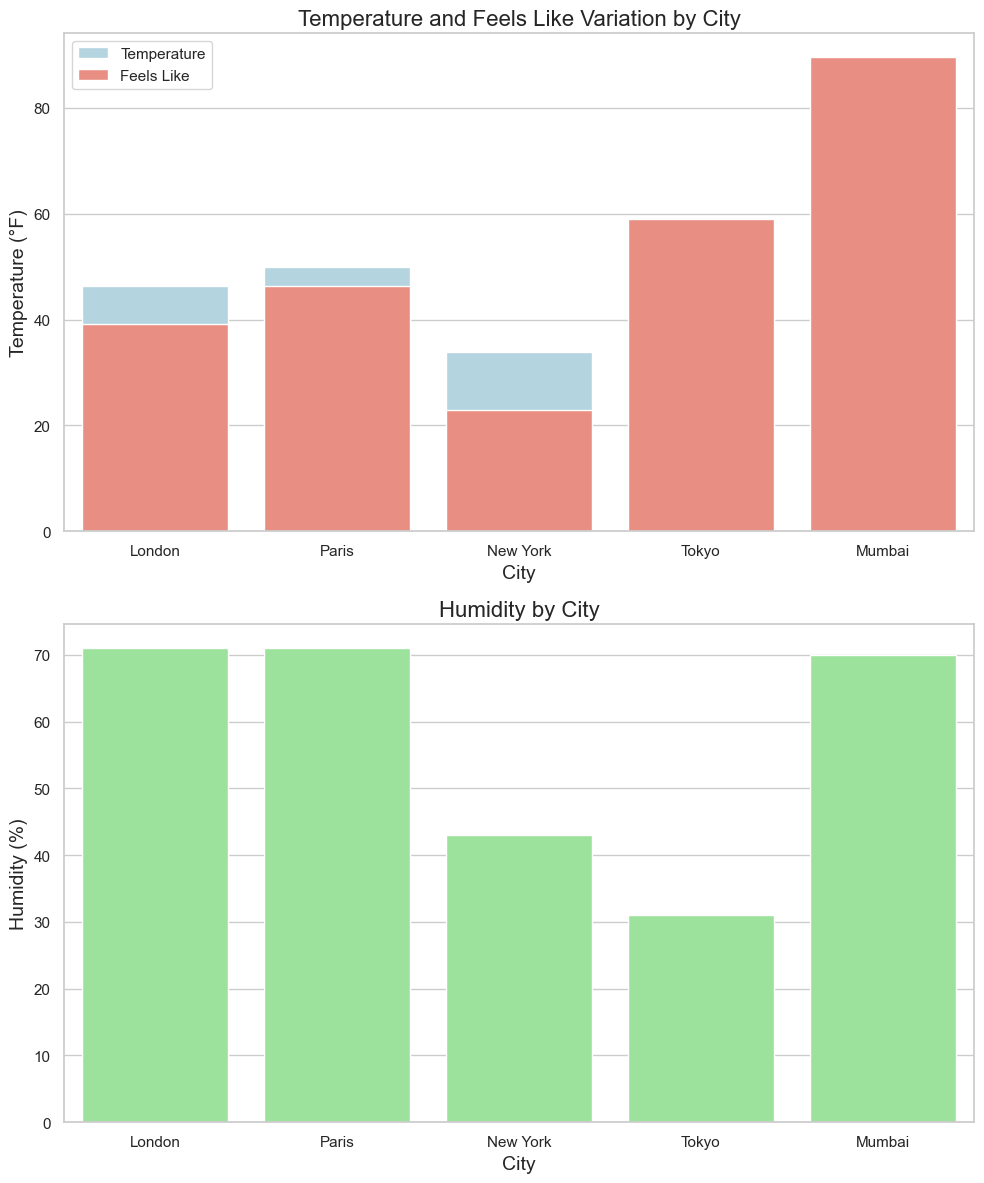

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 1, figsize=(10, 12))


sns.barplot(x='City', y='Temp', data=df, ax=axes[0], color='lightblue', label='Temperature')
sns.barplot(x='City', y='Feels_Like', data=df, ax=axes[0], color='salmon', label='Feels Like')


axes[0].set_title('Temperature and Feels Like Variation by City', fontsize=16)
axes[0].set_ylabel('Temperature (°F)', fontsize=14)
axes[0].set_xlabel('City', fontsize=14)
axes[0].legend()


sns.barplot(x='City', y='Humidity', data=df, ax=axes[1], color='lightgreen')

axes[1].set_title('Humidity by City', fontsize=16)
axes[1].set_ylabel('Humidity (%)', fontsize=14)
axes[1].set_xlabel('City', fontsize=14)


plt.tight_layout()


plt.show()

In [5]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a DataFrame
df = pd.DataFrame(data)


df_melted = pd.melt(df, id_vars='City', value_vars=['Temp', 'Feels_Like'], 
                    var_name='Type', value_name='Value')


plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Value', hue='Type', data=df_melted, palette='pastel')


plt.title('Temperature and Feels Like Variation by City', fontsize=16)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.xlabel('City', fontsize=14)


plt.tight_layout()
plt.show()

ValueError: If using all scalar values, you must pass an index

In [8]:
print(df)

       City  Temp  Humidity  Feels_Like
0    London  46.4        71        39.2
1     Paris  50.0        71        46.4
2  New York  33.8        43        23.0
3     Tokyo  59.0        31        59.0
4    Mumbai  82.4        70        89.6


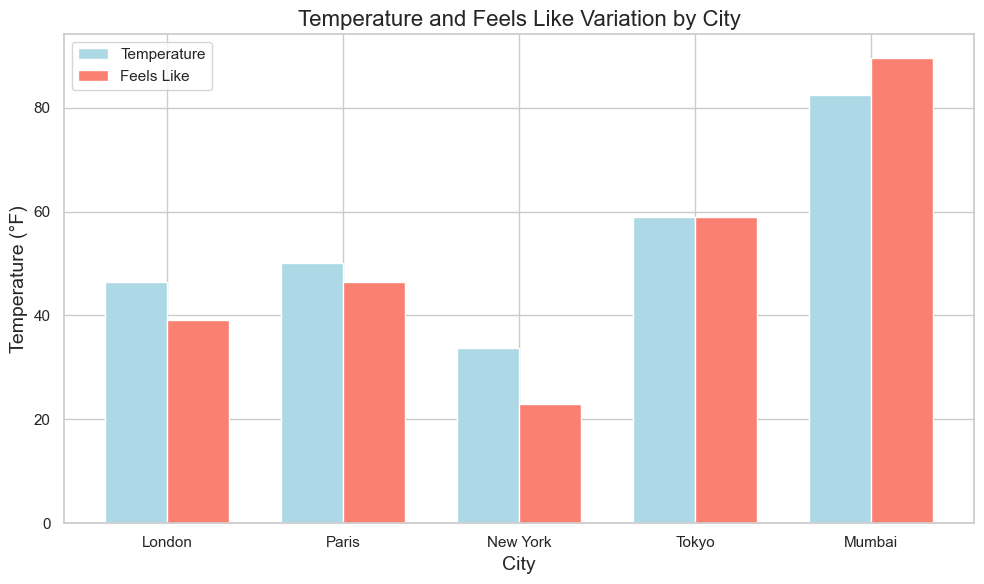

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('weather_data.csv') 


bar_width = 0.35
x = np.arange(len(df['City']))


fig, ax = plt.subplots(figsize=(10, 6))


bars1 = ax.bar(x - bar_width/2, df['Temp'], width=bar_width, label='Temperature', color='lightblue')
bars2 = ax.bar(x + bar_width/2, df['Feels_Like'], width=bar_width, label='Feels Like', color='salmon')

# Set titles and labels
ax.set_title('Temperature and Feels Like Variation by City', fontsize=16)
ax.set_ylabel('Temperature (°F)', fontsize=14)
ax.set_xlabel('City', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df['City'])
ax.legend()


plt.tight_layout()
plt.show()

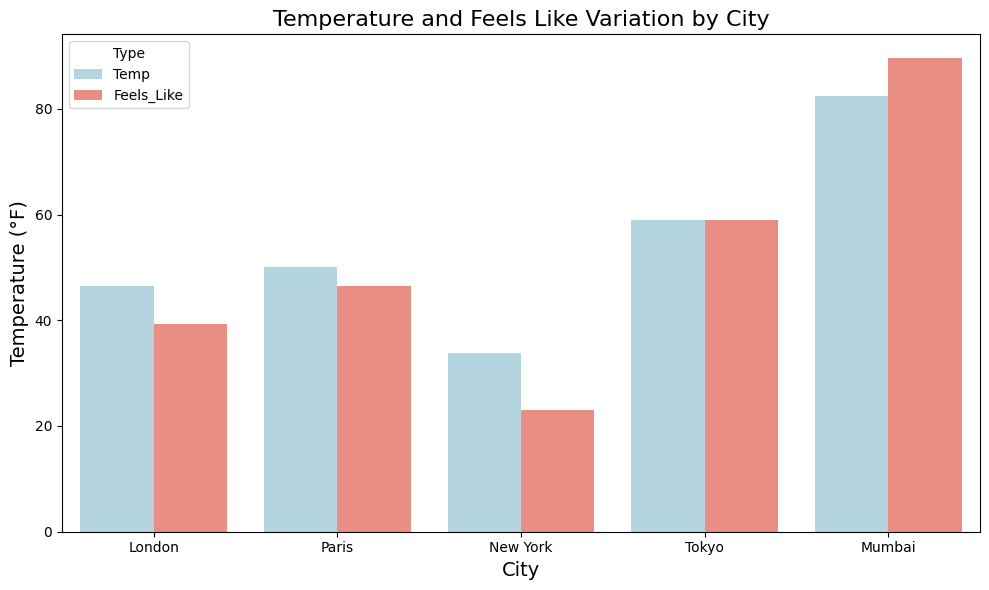

       City        Type  Temperature
0    London        Temp         46.4
1     Paris        Temp         50.0
2  New York        Temp         33.8
3     Tokyo        Temp         59.0
4    Mumbai        Temp         82.4
5    London  Feels_Like         39.2
6     Paris  Feels_Like         46.4
7  New York  Feels_Like         23.0
8     Tokyo  Feels_Like         59.0
9    Mumbai  Feels_Like         89.6


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('weather_data.csv')

# Melt the dataframe to long format for seaborn
df_melted = df.melt(id_vars='City', value_vars=['Temp', 'Feels_Like'], var_name='Type', value_name='Temperature')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Temperature', hue='Type', data=df_melted, palette=['lightblue', 'salmon'])

# Set titles and labels
plt.title('Temperature and Feels Like Variation by City', fontsize=16)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.xlabel('City', fontsize=14)

plt.tight_layout()
plt.show()

print(df_melted)

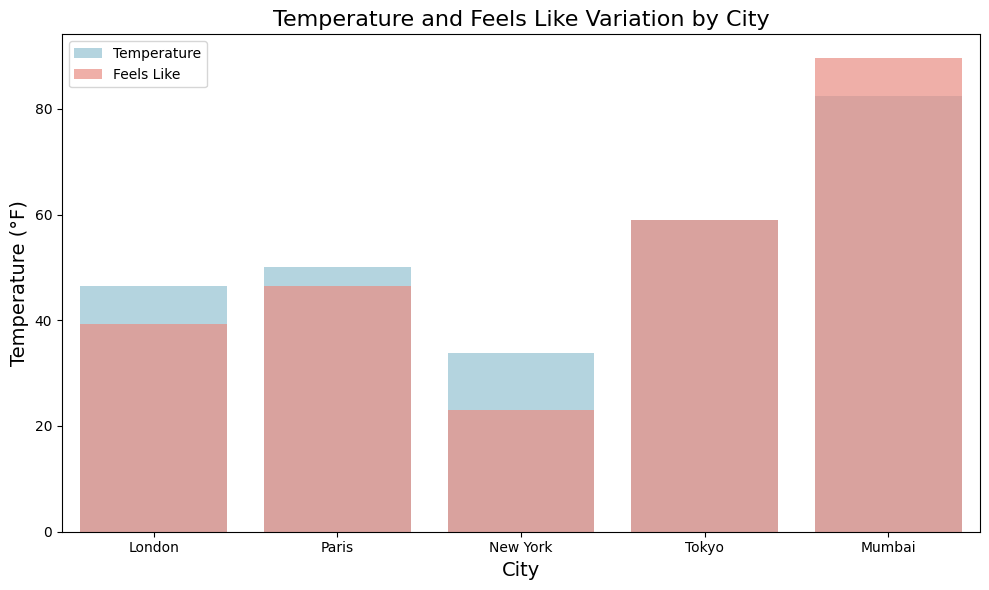

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('weather_data.csv')

# Create the bar plot
plt.figure(figsize=(10, 6))

# Plot Temperature
sns.barplot(x='City', y='Temp', data=df, color='lightblue', label='Temperature')

# Plot Feels Like
sns.barplot(x='City', y='Feels_Like', data=df, color='salmon', label='Feels Like', alpha=0.7)

# Set titles and labels
plt.title('Temperature and Feels Like Variation by City', fontsize=16)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.xlabel('City', fontsize=14)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

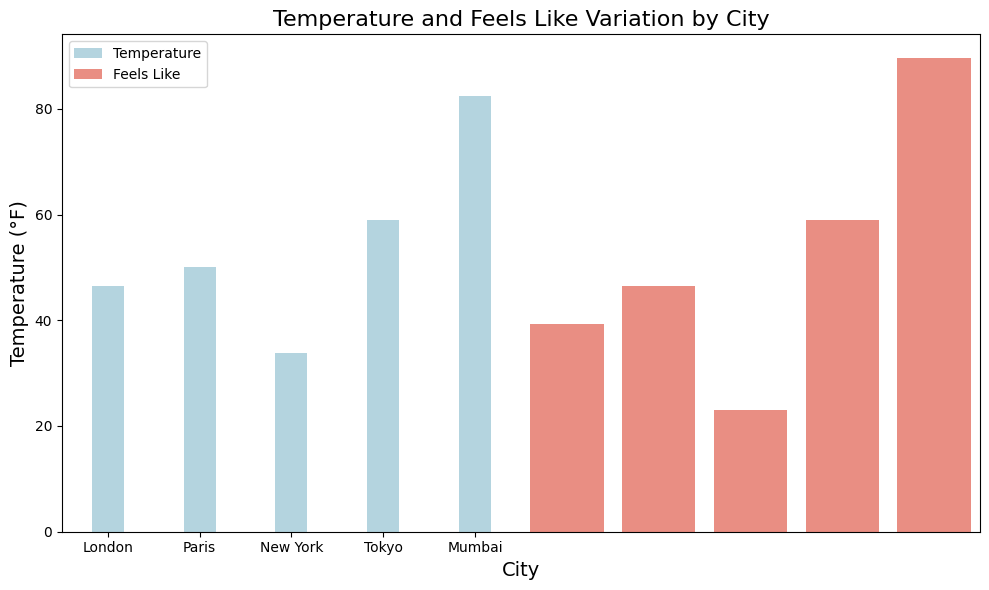

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('weather_data.csv')

# Create the bar plot
plt.figure(figsize=(10, 6))

# Define the bar width and positions
bar_width = 0.35
x = np.arange(len(df['City']))

# Plot Temperature
sns.barplot(x=x - bar_width/2, y='Temp', data=df,width=bar_width color='lightblue', label='Temperature')
x - bar_width/2, df['Temp'], width=bar_width, label='Temperature', color='lightblue

# Plot Feels Like
sns.barplot(x=x + bar_width/2, y='Feels_Like', data=df, color='salmon', label='Feels Like')

# Set titles and labels
plt.title('Temperature and Feels Like Variation by City', fontsize=16)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(ticks=x, labels=df['City'])

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import requests

# API and cities
API_KEY = "YOUR_API_KEY"  # Replace with your OpenWeatherMap API key
BASE_URL = "http://api.weatherstack.com/"
cities = ["London", "Paris", "New York", "Tokyo", "Mumbai"]

# Function to convert Kelvin to Fahrenheit
def kelvin_to_fahrenheit(kelvin):
    return (kelvin - 273.15) * 9/5 + 32

# Fetch data for each city
weather_data = []
for city in cities:
    response = requests.get(BASE_URL, params={"q": city, "appid": API_KEY})
    if response.status_code == 200:
        data = response.json()
        city_weather = {
            "City": city,
            "Temp": kelvin_to_fahrenheit(data["main"]["temp"]),
            "Temp_Min": kelvin_to_fahrenheit(data["main"]["temp_min"]),
            "Temp_Max": kelvin_to_fahrenheit(data["main"]["temp_max"]),
            "Humidity": data["main"]["humidity"]
        }
        weather_data.append(city_weather)
    else:
        print(f"Failed to fetch data for {city}. Status code: {response.status_code}")

# Display fetched data
for data in weather_data:
    print(data)


In [ ]:
import pymssql

# Connect to SQL Server
conn = pymssql.connect(server="YOUR_SERVER", user="YOUR_USERNAME", password="YOUR_PASSWORD", database="YOUR_DATABASE")
cursor = conn.cursor()

# Insert data into the table
for data in weather_data:
    cursor.execute("""
        INSERT INTO WeatherData (City, Temp, Temp_Min, Temp_Max, Humidity)
        VALUES (%s, %s, %s, %s, %s)
    """, (data["City"], data["Temp"], data["Temp_Min"], data["Temp_Max"], data["Humidity"]))

conn.commit()
cursor.close()
conn.close()

print("Data inserted into WeatherData table.")


In [ ]:
import pandas as pd

# Fetch data from SQL Server into a DataFrame
conn = pymssql.connect(server="YOUR_SERVER", user="YOUR_USERNAME", password="YOUR_PASSWORD", database="YOUR_DATABASE")
query = "SELECT * FROM WeatherData"
df = pd.read_sql(query, conn)
conn.close()

print(df)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Temp, Temp_Min, Temp_Max
sns.set(style="whitegrid")
df_melted = df.melt(id_vars="City", value_vars=["Temp", "Temp_Min", "Temp_Max"], var_name="Type", value_name="Temperature")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="City", y="Temperature", hue="Type")
plt.title("Temperature Variations in Cities")
plt.ylabel("Temperature (°F)")
plt.show()

# Plot Humidity
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="City", y="Humidity", palette="cool")
plt.title("Humidity in Cities")
plt.ylabel("Humidity (%)")
plt.show()
